In [9]:
# clone the yolov5 for local usage

import shutil, os

if(not os.path.exists('yolov5')):
    !git clone https://github.com/ultralytics/yolov5  # clone
    %cd yolov5
    %pip install -qr requirements.txt  # install
    %cd ..
    
    shutil.move('best.pt', 'yolov5/best.pt')

The yolov5 model 'best.pt' has been traind using the roboflow/google colab. For more information on the framework and procedure please visit links: 
YouTube walkthrough:
https://www.youtube.com/watch?v=x0ThXHbtqCQ&t=1s

Blog:
https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/

Link to roboflow workspace (labelling and preprocessing):
https://app.roboflow.com/amr-tfiq4/amr-el3gn/2

Link to Google Colab (traning and evaluation):
https://colab.research.google.com/drive/11ETwF0uNgZMDLVRLXGfUKpYcqe3K2Rut?usp=sharing

In [4]:
# Apply costum traind yolov5 model on images and find coin, star, and/or toad

import torch
from PIL import Image
import torch
import glob

# init bools
coin_found = False
star_found = False
toad_found = False

# Loading costume Model
model = torch.hub.load('yolov5', 'custom', path='yolov5/best.pt', source='local')

# Images
# Please either put test images in 'test_images' folder or insert desired folder and path in code
imgs = [Image.open(file) for file in glob.glob("test_images/*.png")] #read multiple images from a folder

# Inference
results = model(imgs)

# Results
results.save()  # or .show() for images in full size


# Going through all classes found in each image to see if we found coin, star or/and toad
for i in range (len(results.xyxy)):
    for j in range(len(results.xyxy[i])):
        if (int(results.xyxy[i][j][5].numpy()) == 0):
            coin_found = True
        if (int(results.xyxy[i][j][5].numpy()) == 1):
            star_found = True
        if (int(results.xyxy[i][j][5].numpy()) == 2):
            toad_found = True
            

if(coin_found):
    print("A coin was found during flight")
else:
    print("A coin was NOT found during flight")
    
if(star_found):
    print("A star was found during flight")
else:
    print("A star was NOT found during flight")
    
if(toad_found):
    print("A toad was found during flight")
else:
    print("A toad was NOT found during flight")
    


YOLOv5 🚀 v6.1-176-gaa7a0e9 torch 1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 10 images to runs/detect/exp


A coin was found during flight
A star was found during flight
A toad was found during flight


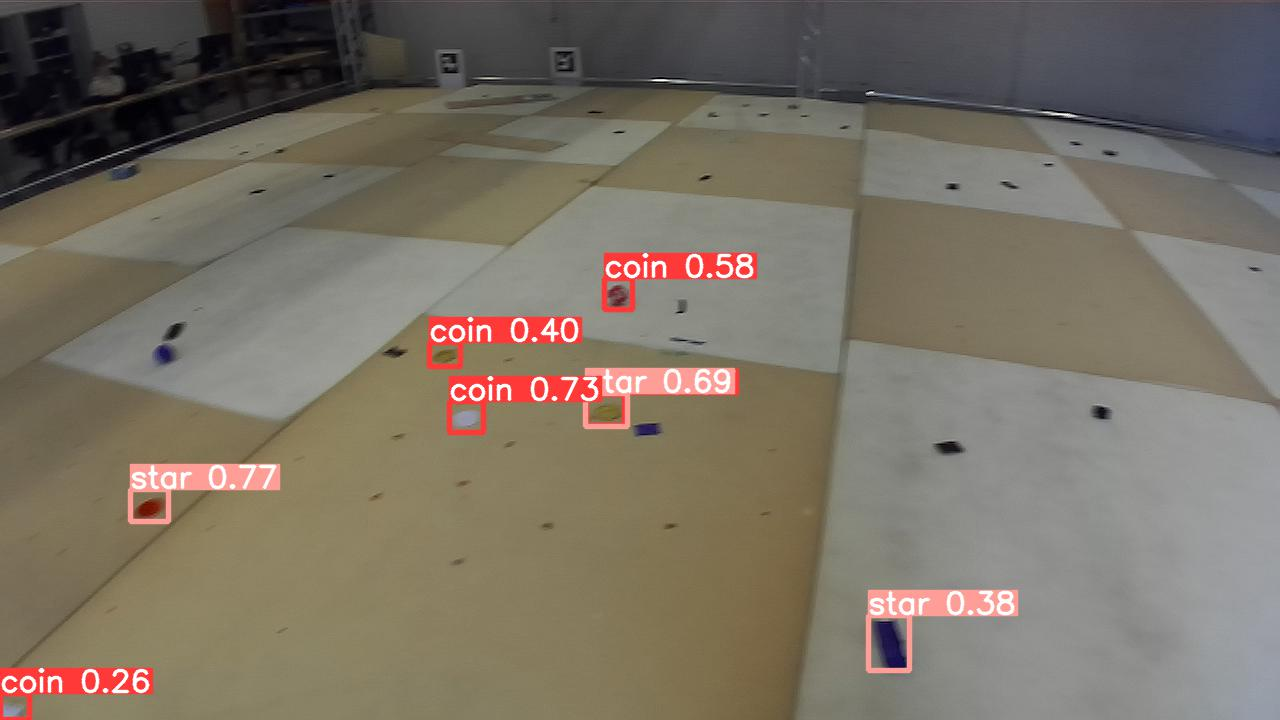

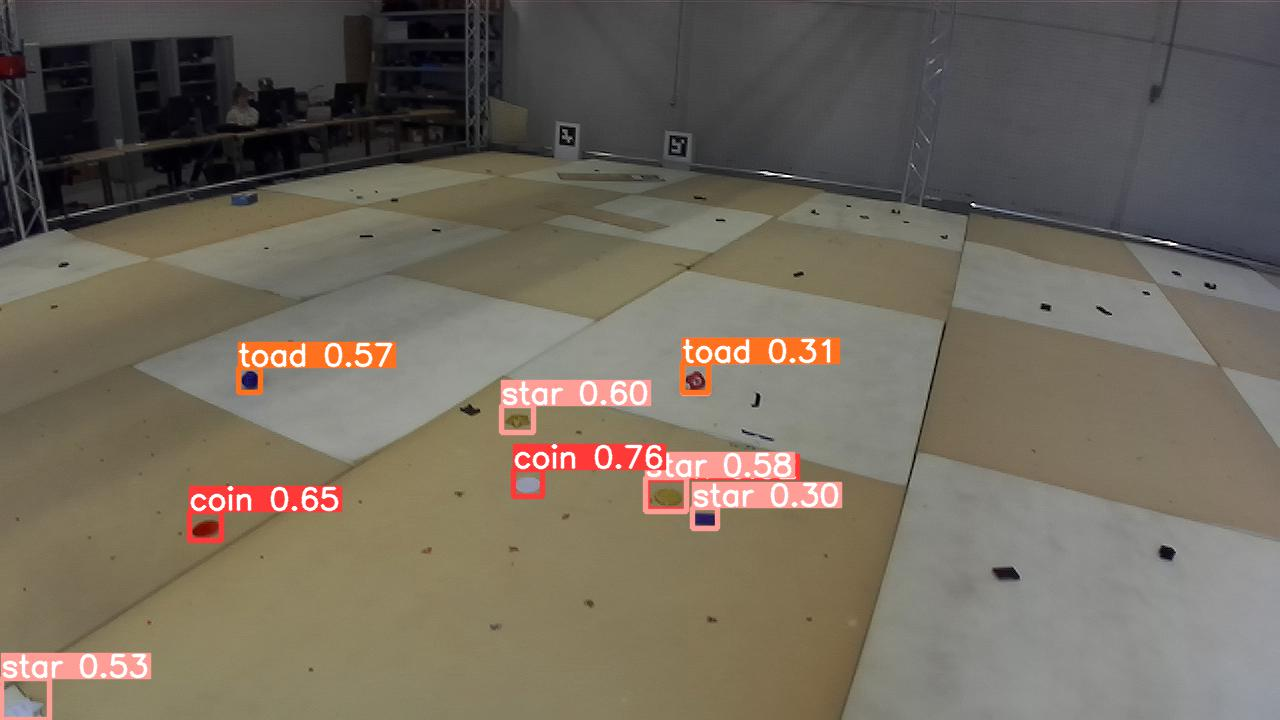

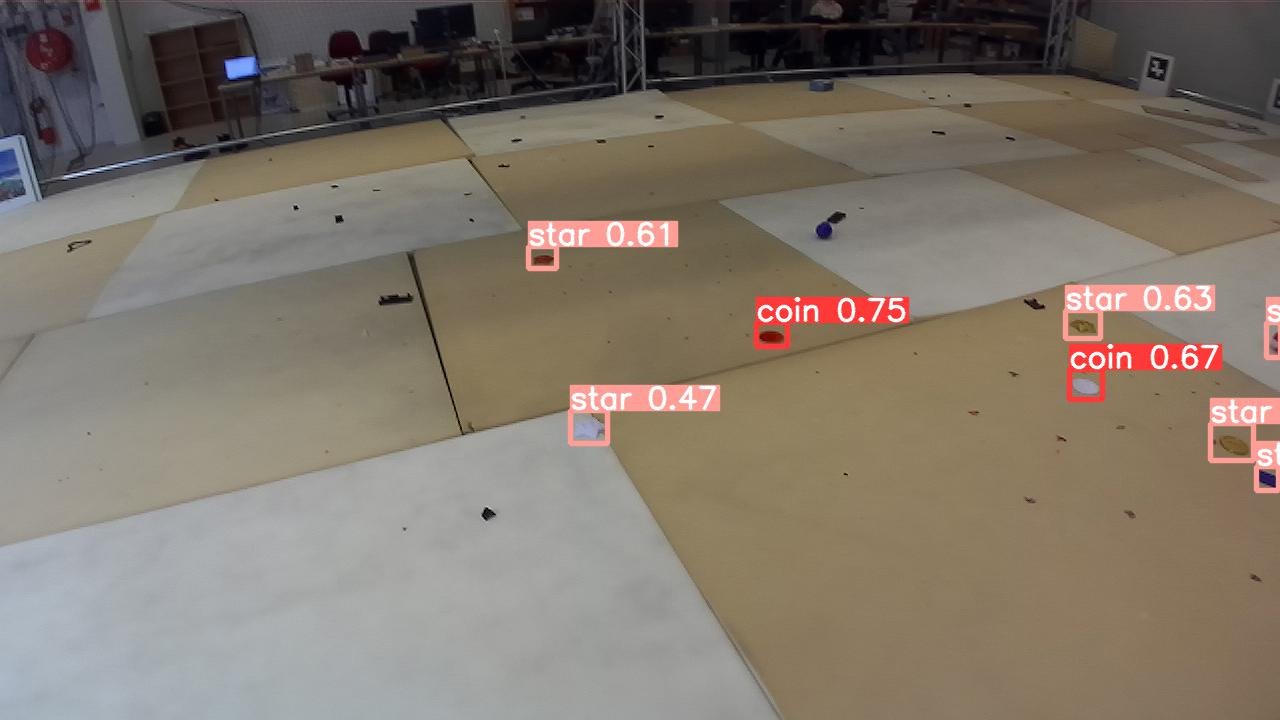

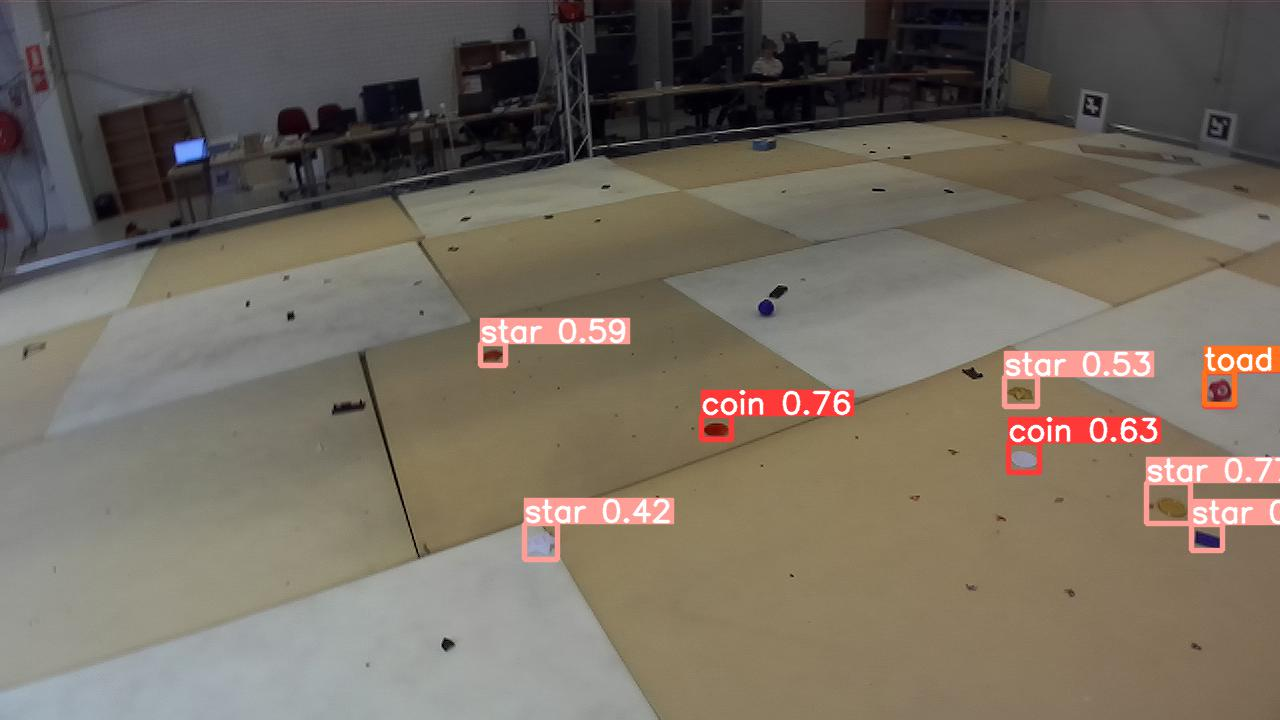

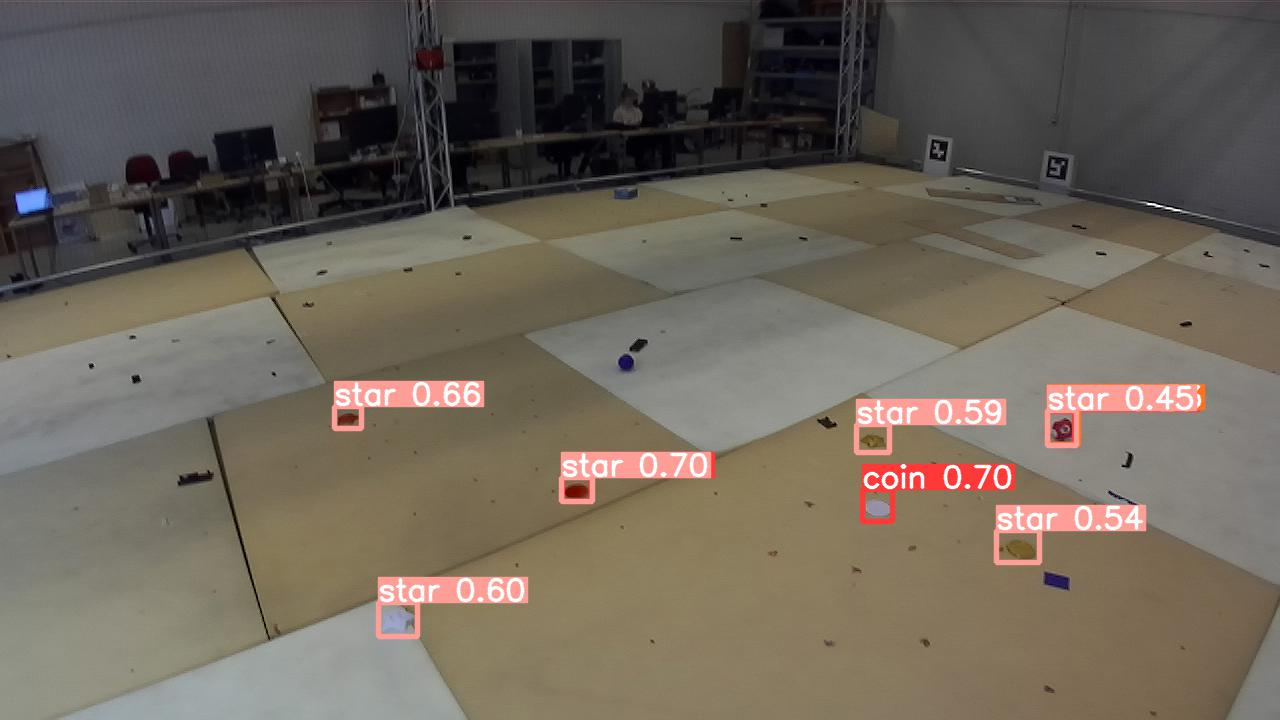

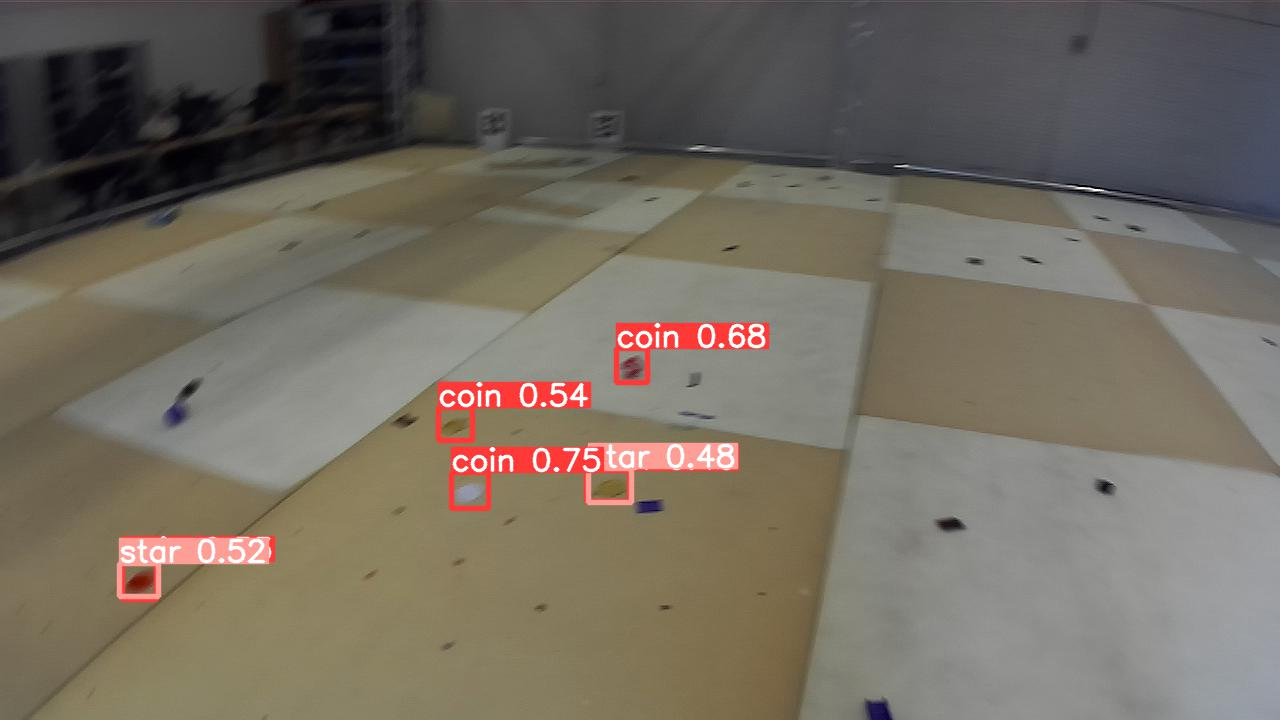

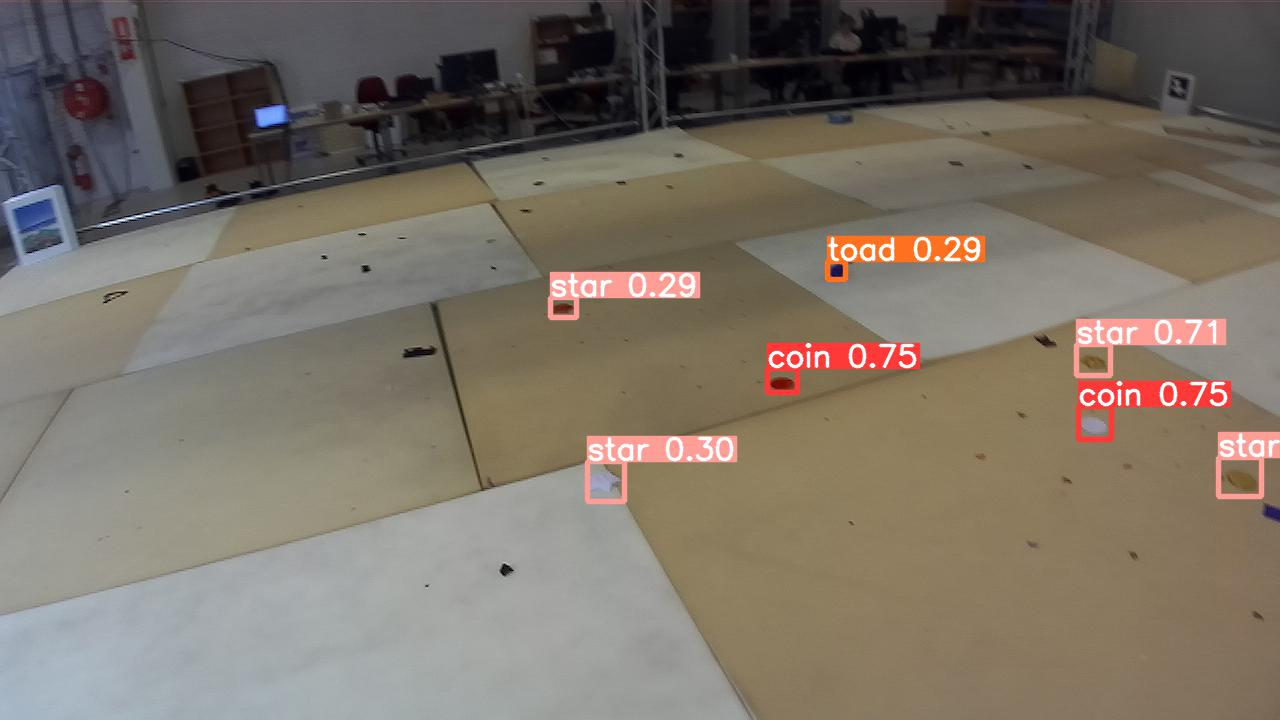

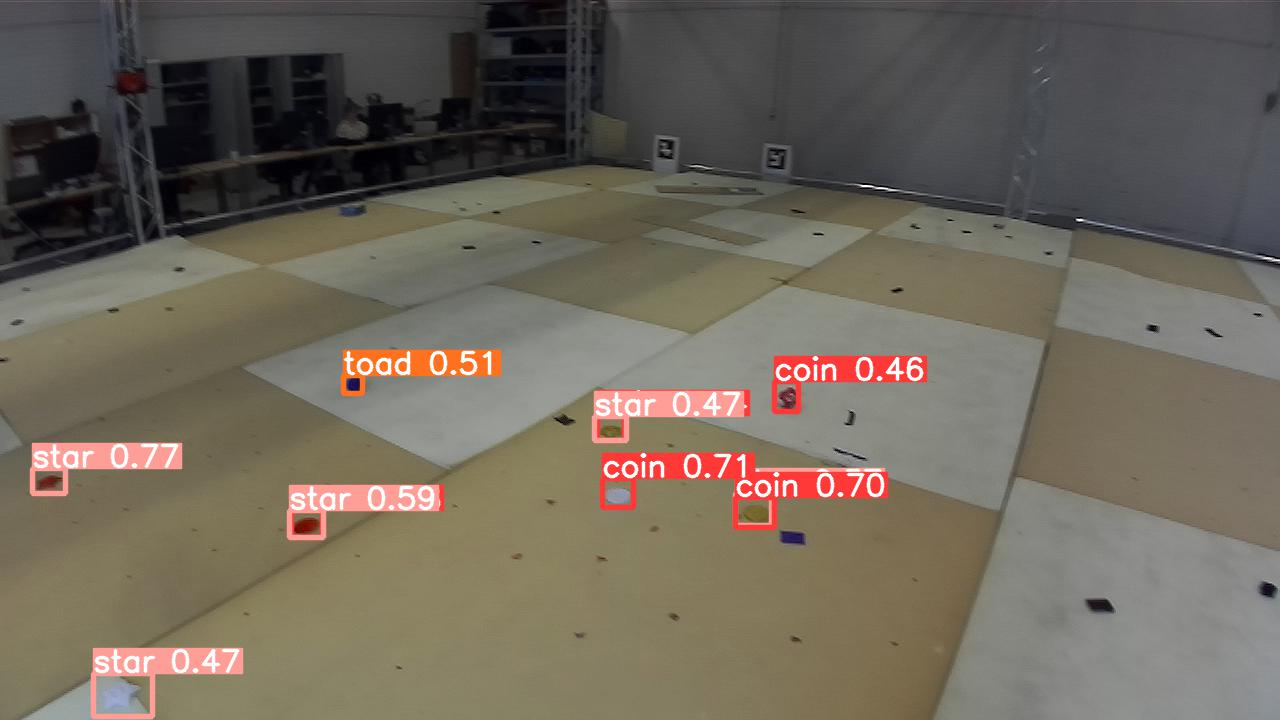

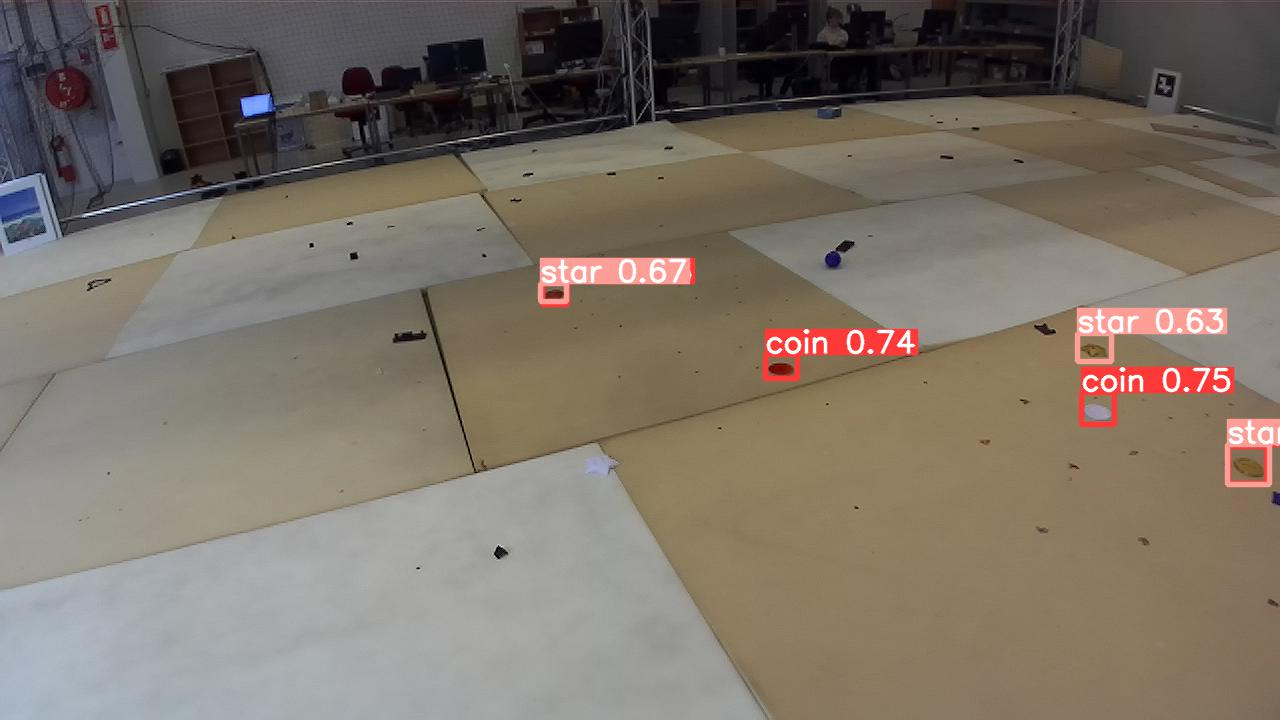

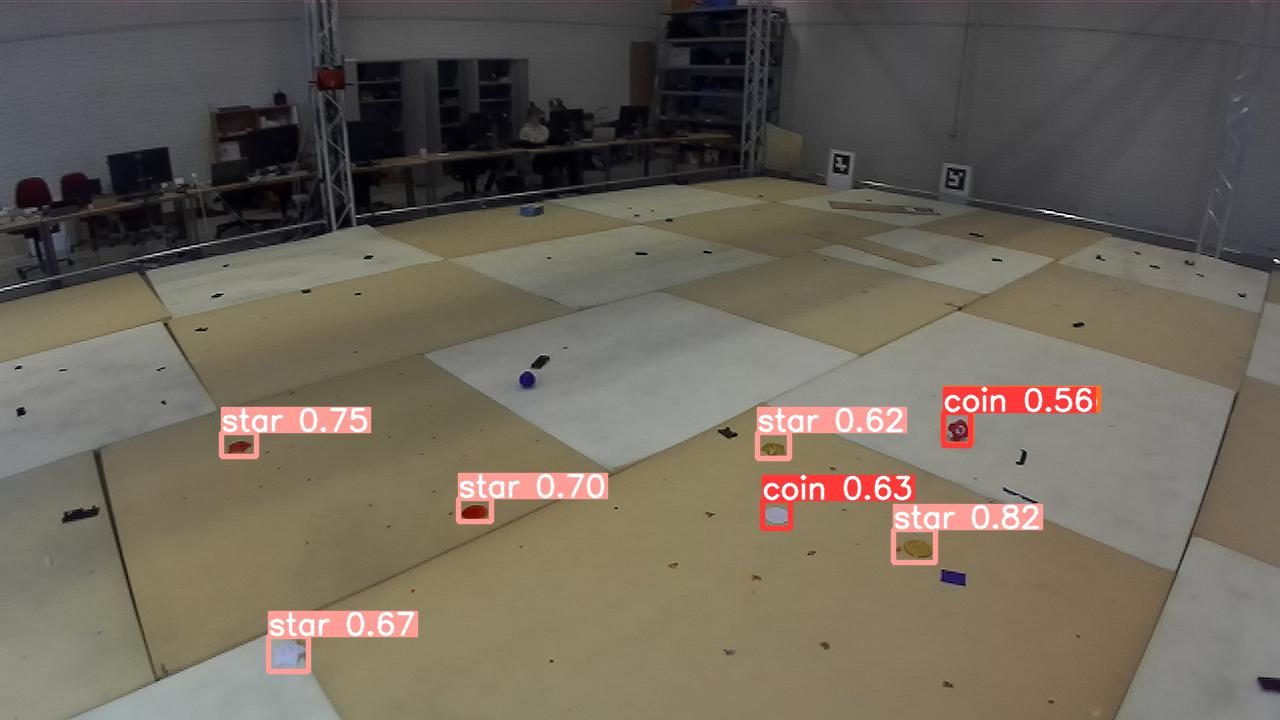

In [5]:
#Show images with bounding boxes
from IPython.display import Image, display

#NOTE: if you above cell multiple times it will create folders named exp, exp2, exp3 etc. 
for imageName in glob.glob('runs/detect/exp/*.jpg'): #assuming jpg
    display(Image(filename=imageName))
    print("\n")


In [6]:
# result table for first image
results.pandas().xyxy[0]  # img1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,1218.198120,457.817230,1261.093140,496.427307,0.757351,1,star
1,767.459412,368.811127,797.549744,392.519440,0.754450,0,coin
2,1078.325317,406.176605,1111.598999,439.607269,0.753877,0,coin
3,1076.260498,344.870758,1110.517090,375.248993,0.706960,1,star
4,587.757935,461.665222,624.456177,501.220215,0.300577,1,star
5,550.091614,297.123657,576.770081,317.422424,0.292811,1,star
6,827.495667,261.600464,845.010193,279.666321,0.287931,2,toad
